<a href="https://colab.research.google.com/github/anamkhan315/test2/blob/main/ARIMA_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

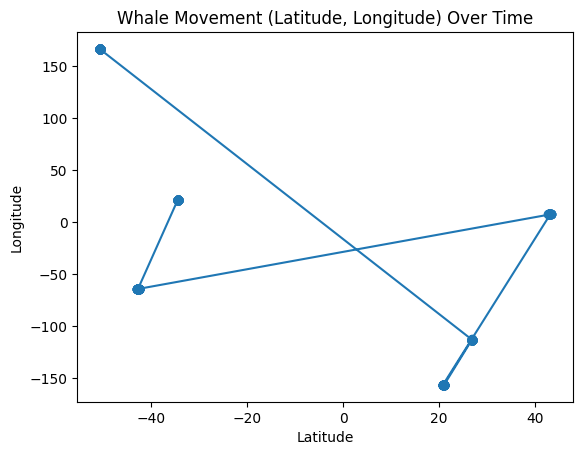

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Latitude ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:               latitude   No. Observations:                  633
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 996.242
Date:                Sat, 07 Dec 2024   AIC                          -1986.483
Time:                        10:31:13   BIC                          -1973.137
Sample:                             0   HQIC                         -1981.300
                                - 633                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4121      0.468     -0.881      0.378      -1.328       0.504
ma.L1          0.4138      0.468      0.884      0.377      -0.504       1.331
sigma2         0.0025 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


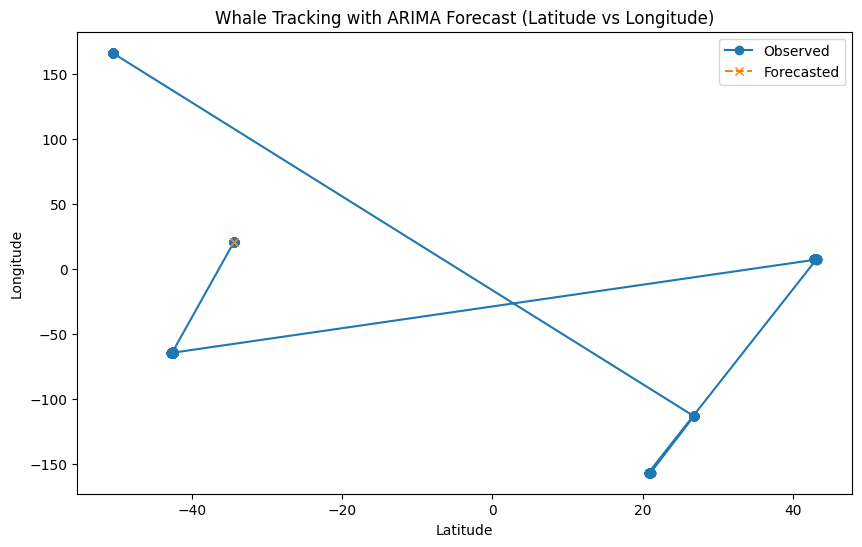

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Step 1: Read Data from CSV
file_path = '/content/drive/MyDrive/Whales CSV.csv'  # Update this to your file path
df = pd.read_csv(file_path)

# Step 2: Preprocess Data
# Convert timestamp to pandas datetime format
df['time'] = pd.to_datetime(df['time'])

# Set timestamp as the index
df.set_index('time', inplace=True)

# Step 3: Visualize Whale Movement (optional)
plt.plot(df['latitude'], df['longitude'], marker='o')
plt.title("Whale Movement (Latitude, Longitude) Over Time")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

# Step 4: Normalize Latitude and Longitude
scaler_lat = MinMaxScaler(feature_range=(0, 1))
scaler_lon = MinMaxScaler(feature_range=(0, 1))

# Normalize latitude and longitude
df_scaled = df.copy()
df_scaled['latitude'] = scaler_lat.fit_transform(df[['latitude']])
df_scaled['longitude'] = scaler_lon.fit_transform(df[['longitude']])

# Step 5: ARIMA Forecasting for Latitude and Longitude
latitude_series = df_scaled['latitude']
longitude_series = df_scaled['longitude']
# Fit ARIMA model for latitude
model_lat = ARIMA(latitude_series, order=(1, 1, 1))  # (p, d, q)
model_lat_fit = model_lat.fit()

# Fit ARIMA model for longitude
model_lon = ARIMA(longitude_series, order=(1, 1, 1))
model_lon_fit = model_lon.fit()

# Step 6: Print ARIMA Summaries
print("Latitude ARIMA Model Summary:")
print(model_lat_fit.summary())
print("\nLongitude ARIMA Model Summary:")
print(model_lon_fit.summary())

# Step 7: Forecast the next 5 positions for both latitude and longitude
forecast_steps = 5
forecast_lat = model_lat_fit.forecast(steps=forecast_steps)
forecast_lon = model_lon_fit.forecast(steps=forecast_steps)
# Reverse the normalization (to get actual latitude and longitude values)
forecast_lat_rescaled = scaler_lat.inverse_transform(forecast_lat.values.reshape(-1, 1))
forecast_lon_rescaled = scaler_lon.inverse_transform(forecast_lon.values.reshape(-1, 1))

# Output the forecasted positions
print("\nForecasted Latitude Positions:", forecast_lat_rescaled.flatten())
print("Forecasted Longitude Positions:", forecast_lon_rescaled.flatten())

# Step 8: Visualize Forecasted Positions
plt.figure(figsize=(10, 6))
plt.plot(df['latitude'], df['longitude'], marker='o', label='Observed')
plt.plot(forecast_lat_rescaled.flatten(), forecast_lon_rescaled.flatten(), marker='x', label='Forecasted', linestyle='--')
plt.title("Whale Tracking with ARIMA Forecast (Latitude vs Longitude)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

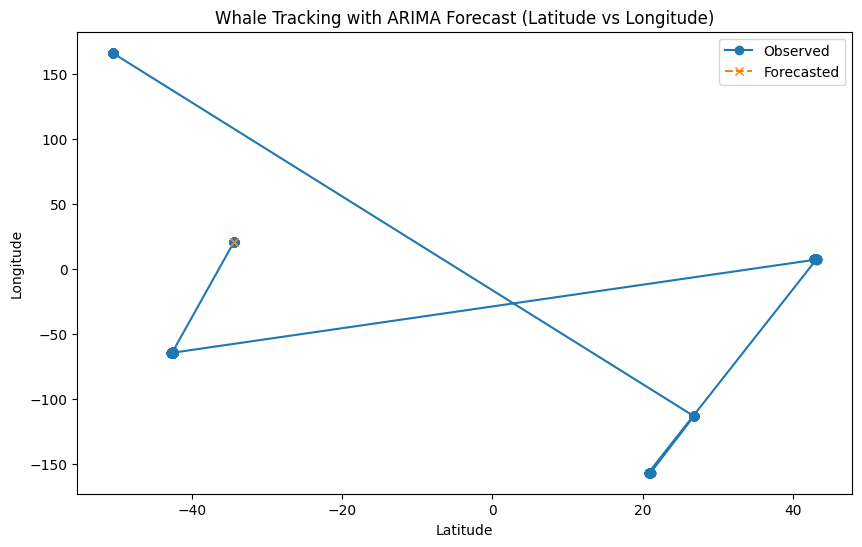

In [6]:
!pip install folium
import pandas as pd
import folium
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Step 1: Read Data from CSV
file_path = '/content/drive/MyDrive/Whales CSV.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 2: Preprocess Data
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Step 3: Normalize Latitude and Longitude
scaler_lat = MinMaxScaler(feature_range=(0, 1))
scaler_lon = MinMaxScaler(feature_range=(0, 1))

df_scaled = df.copy()
df_scaled['latitude'] = scaler_lat.fit_transform(df[['latitude']])
df_scaled['longitude'] = scaler_lon.fit_transform(df[['longitude']])

# Step 4: ARIMA Forecasting for Latitude and Longitude
latitude_series = df_scaled['latitude']
longitude_series = df_scaled['longitude']

# Fit ARIMA model for latitude and longitude
model_lat = ARIMA(latitude_series, order=(1, 1, 1))  # ARIMA(p, d, q)
model_lat_fit = model_lat.fit()

model_lon = ARIMA(longitude_series, order=(1, 1, 1))
model_lon_fit = model_lon.fit()

# Forecast the next 5 positions
forecast_steps = 5
forecast_lat = model_lat_fit.forecast(steps=forecast_steps)
forecast_lon = model_lon_fit.forecast(steps=forecast_steps)

# Reverse the normalization (to get actual latitude and longitude values)
forecast_lat_rescaled = scaler_lat.inverse_transform(forecast_lat.values.reshape(-1, 1))
forecast_lon_rescaled = scaler_lon.inverse_transform(forecast_lon.values.reshape(-1, 1))

# Get the last known whale position
current_lat = df['latitude'].iloc[-1]
current_lon = df['longitude'].iloc[-1]

# Step 5: Create Map to Visualize Real-Time and Predicted Locations

# Create a folium map centered on the last known position of the whale
map_center = [current_lat, current_lon]  # Center map at the whale's last known location
whale_map = folium.Map(location=map_center, zoom_start=12)

# Add marker for the current position (real-time)
folium.Marker([current_lat, current_lon], popup="Current Position", icon=folium.Icon(color='blue')).add_to(whale_map)

# Add markers for the predicted positions
for i in range(forecast_steps):
    folium.Marker(
        [forecast_lat_rescaled[i][0], forecast_lon_rescaled[i][0]],
        popup=f"Predicted Position {i + 1}",
        icon=folium.Icon(color='red')
    ).add_to(whale_map)

# Step 6: Save Map to HTML File
whale_map.save("whale_tracking_map.html")

# Step 7: Plot the forecasted positions (optional)
plt.figure(figsize=(10, 6))
plt.plot(df['latitude'], df['longitude'], marker='o', label='Observed')
plt.plot(forecast_lat_rescaled.flatten(), forecast_lon_rescaled.flatten(), marker='x', label='Forecasted', linestyle='--')
plt.title("Whale Tracking with ARIMA Forecast (Latitude vs Longitude)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

# If you're working in a Jupyter notebook, you can display the map directly:
# whale_map


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

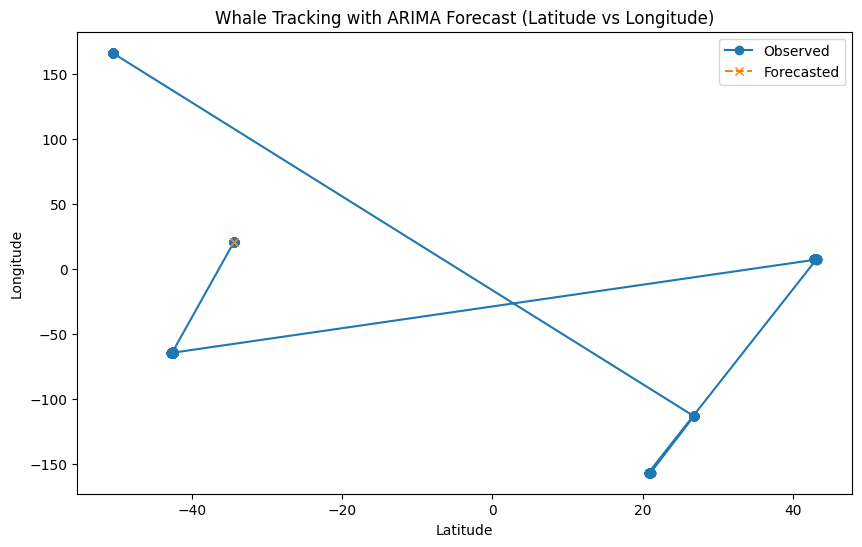

In [9]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display  # Used to display the folium map in Colab

# Step 1: Read Data from CSV
file_path = '/content/drive/MyDrive/Whales CSV.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 2: Preprocess Data
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Step 3: Normalize Latitude and Longitude
scaler_lat = MinMaxScaler(feature_range=(0, 1))
scaler_lon = MinMaxScaler(feature_range=(0, 1))

df_scaled = df.copy()
df_scaled['latitude'] = scaler_lat.fit_transform(df[['latitude']])
df_scaled['longitude'] = scaler_lon.fit_transform(df[['longitude']])

# Step 4: ARIMA Forecasting for Latitude and Longitude
latitude_series = df_scaled['latitude']
longitude_series = df_scaled['longitude']

# Fit ARIMA model for latitude and longitude
model_lat = ARIMA(latitude_series, order=(1, 1, 1))  # ARIMA(p, d, q)
model_lat_fit = model_lat.fit()

model_lon = ARIMA(longitude_series, order=(1, 1, 1))
model_lon_fit = model_lon.fit()

# # Forecast the next 5 positions
# forecast_steps = 5
# forecast_lat = model_lat_fit.forecast(steps=forecast_steps)
# forecast_lon = model_lon_fit.forecast(steps=forecast_steps)

# Reverse the normalization (to get actual latitude and longitude values)
forecast_lat_rescaled = scaler_lat.inverse_transform(forecast_lat.values.reshape(-1, 1))
forecast_lon_rescaled = scaler_lon.inverse_transform(forecast_lon.values.reshape(-1, 1))

# Get the last known whale position
current_lat = df['latitude'].iloc[-1]
current_lon = df['longitude'].iloc[-1]

# Step 5: Create Map to Visualize Real-Time and Predicted Locations

# Create a folium map centered on the last known position of the whale
map_center = [current_lat, current_lon]  # Center map at the whale's last known location
whale_map = folium.Map(location=map_center, zoom_start=12)

# Add marker for the current position (real-time)
folium.Marker([current_lat, current_lon], popup="Current Position", icon=folium.Icon(color='blue')).add_to(whale_map)

# Add markers for the predicted positions
for i in range(forecast_steps):
    folium.Marker(
        [forecast_lat_rescaled[i][0], forecast_lon_rescaled[i][0]],
        popup=f"Predicted Position {i + 1}",
        icon=folium.Icon(color='red')
    ).add_to(whale_map)

# Step 6: Display the Map in Google Colab
display(whale_map)  # This will render the map directly in Colab

# Step 7: Plot the forecasted positions (optional)
plt.figure(figsize=(10, 6))
plt.plot(df['latitude'], df['longitude'], marker='o', label='Observed')
plt.plot(forecast_lat_rescaled.flatten(), forecast_lon_rescaled.flatten(), marker='x', label='Forecasted', linestyle='--')
plt.title("Whale Tracking with ARIMA Forecast (Latitude vs Longitude)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()
